In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import QuantLib as ql
%matplotlib inline

# CO6: Volatility Analysis
#### Definition: CO6 is the 6th serial future contract on crude brent.
Load 6 tables:

1.   CO6 Volatility from Aug 2017 till Aug 2020 (4 time-series: Historical, ATM implied, 80% ATM implied and 60% ATM implied)
2.   CO6 Volatility from Feb 2008 till Jun 2009 (4 time-series: Historical, ATM implied, 80% ATM implied and 60% ATM implied)
3.   CO6 Volatility 4 time-series from Oct 2014 till Jan 2015 (4 time-series: Historical, ATM implied, 80% ATM implied and 60% ATM implied)
4.   COH1 Volatility 3 time-series from Aug 2017 till Aug 2020 (3 time-series: Historical, ATM implied and 80% ATM)
5.   CO6 price and open interest time-series from 2007 till 2020
6.   COH1P35 - the price and open interest of the Put option on with strike 35

In [13]:
dvol_CO6_17_20 = pd.read_csv("CO6_17_20.csv")
dvol_CO6_08_09 = pd.read_csv("CO6_08_09.csv")
dvol_CO6_14_15 = pd.read_csv("CO6_14_15.csv")
dvol_COH1_17_20 = pd.read_csv("COH1_17_20.csv")
dprice_CO6_08_20 = pd.read_csv("CO6.csv")
dprice_COH1P35_1Y = pd.read_csv("COH1P35.csv")

dvol_CO6_08_09['Date'] = pd.to_datetime(dvol_CO6_08_09['Date'])
dvol_CO6_14_15['Date']  = pd.to_datetime(dvol_CO6_14_15['Date'])
dvol_CO6_17_20['Date']  = pd.to_datetime(dvol_CO6_17_20['Date'] )
dvol_COH1_17_20['Date']  = pd.to_datetime(dvol_COH1_17_20['Date'])
dprice_CO6_08_20['Date'] = pd.to_datetime(dprice_CO6_08_20['Date'])
dprice_COH1P35_1Y['Date'] = pd.to_datetime(dprice_COH1P35_1Y['Date'])

dvol_CO6_08_09 =dvol_CO6_08_09.set_index('Date')
dvol_CO6_14_15 =dvol_CO6_14_15.set_index('Date')
dvol_CO6_17_20 =dvol_CO6_17_20.set_index('Date')
dvol_COH1_17_20 =dvol_COH1_17_20.set_index('Date')
dprice_CO6_08_20 = dprice_CO6_08_20.set_index('Date')
dprice_COH1P35_1Y = dprice_COH1P35_1Y.set_index('Date')

# Plotting Historical Price of the Underlying CO6

In [14]:
seg1 = ('2007-08-23','2008-02-22')
seg2 = ('2008-02-22','2009-06-22')
seg3 = ('2009-06-22','2014-10-14')
seg4 = ('2014-10-14','2015-01-16')
seg5 = ('2015-01-16','2017-08-24')
seg6 = ('2017-08-24','2020-08-21')

No handles with labels found to put in legend.


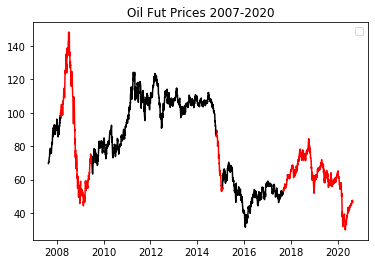

In [15]:
plt.plot(dprice_CO6_08_20["Last Price"].loc[seg6[1]:seg6[0]],'-r')
plt.plot(dprice_CO6_08_20["Last Price"].loc[seg5[1]:seg5[0]],'-k')
plt.plot(dprice_CO6_08_20["Last Price"].loc[seg4[1]:seg4[0]],'-r')
plt.plot(dprice_CO6_08_20["Last Price"].loc[seg3[1]:seg3[0]],'-k')
plt.plot(dprice_CO6_08_20["Last Price"].loc[seg2[1]:seg2[0]],'-r')
plt.plot(dprice_CO6_08_20["Last Price"].loc[seg1[1]:seg1[0]],'-k')
plt.legend()
plt.title('Oil Fut Prices 2007-2020')
plt.show()



We are interested in the periods plotted in red as they exhibit a fast drop in price.

The first part, during the GFC, Oil futures took a deep dive


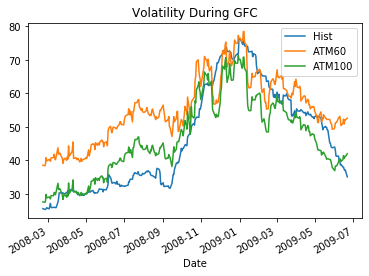

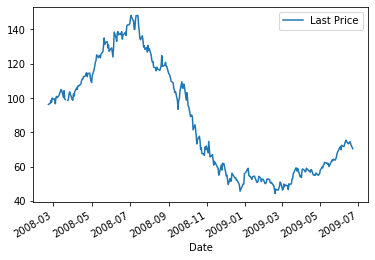

In [16]:
dvol_CO6_08_09.plot(title='Volatility During GFC')
dprice_CO6_08_20[['Last Price']].loc[seg2[1]:seg2[0]].plot()

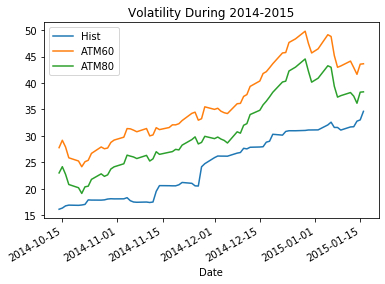

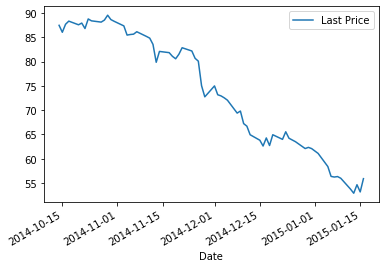

In [17]:
dvol_CO6_14_15[['Hist','ATM60','ATM80']].plot(title='Volatility During 2014-2015')
dprice_CO6_08_20[['Last Price']].loc[seg4[1]:seg4[0]].plot()

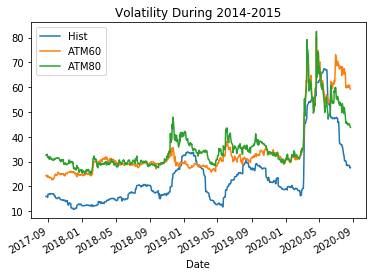

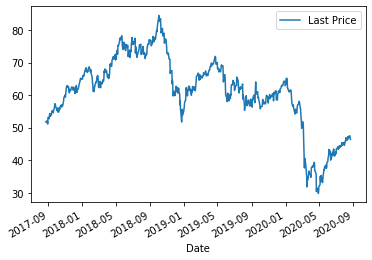

In [18]:
dvol_CO6_17_20[['Hist','ATM60','ATM80']].plot(title='Volatility During 2014-2015')
dprice_CO6_08_20[['Last Price']].loc[seg6[1]:seg6[0]].plot()




# Price Action last 30 Days

In [19]:
s_u_price = dprice_CO6_08_20.iloc[0:30]
s_o_price = dprice_COH1P35_1Y.iloc[0:30]
new_table = dvol_CO6_17_20.iloc[0:30]


new_table

,Hist,ATM100,ATM80,ATM60
Date,,,,
2020-08-21,27.566352,36.121,43.788,59.281
2020-08-20,27.379583,36.022,44.017,59.555
2020-08-19,27.911315,36.279,44.458,59.779
2020-08-18,27.942348,36.087,44.984,60.739
2020-08-17,28.447734,36.525,45.185,60.836
2020-08-14,28.452011,36.668,45.325,60.877
2020-08-13,28.528522,36.706,45.097,59.974
2020-08-12,28.589687,36.294,44.712,59.859
2020-08-11,28.389275,36.537,45.246,60.507


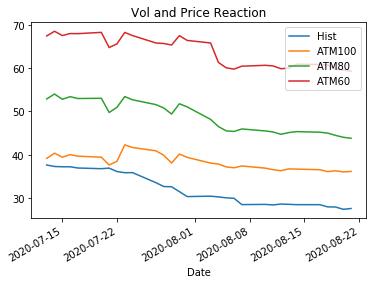

In [20]:
new_table.plot(title="Vol and Price Reaction")

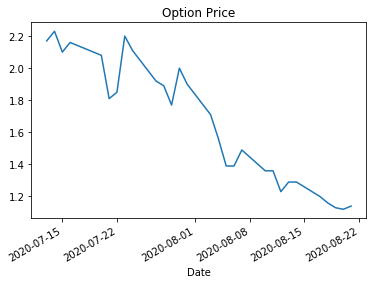

In [21]:
s_o_price['Last Price'].plot(title = "Option Price")

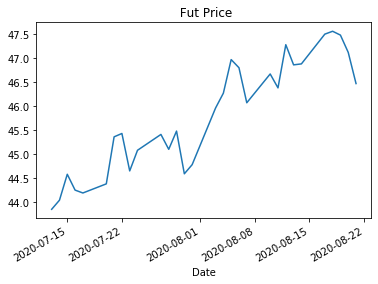

In [22]:
s_u_price['Last Price'].plot(title = " Fut Price")